In [161]:
## Principal components calculations of EEG original data 
## Decision Tree and KNN with transformed data

import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
eeg = pd.read_csv('EEG_data_1.csv')

In [44]:
eeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [46]:
Y = list(eeg.pop('y'))

In [55]:
X = eeg.values

In [56]:
X

array([[ 135,  190,  229, ..., -116,  -83,  -51],
       [ 386,  382,  356, ...,  154,  143,  129],
       [ -32,  -39,  -47, ...,  -35,  -35,  -36],
       ..., 
       [  14,    6,  -13, ...,   -2,   -1,   -8],
       [ -40,  -25,   -9, ...,   68,   59,   55],
       [  29,   41,   57, ...,   -2,    2,   20]], dtype=int64)

In [108]:
pca1 = PCA(n_components=80)

In [109]:
pca1.fit(X)

PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [110]:
var= pca1.explained_variance_ratio_

In [156]:
var1=np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

In [157]:
print(var1)

[  5.59  10.85  15.8   20.62  25.06  29.2   33.27  37.19  40.81  44.26
  47.56  50.8   53.77  56.69  59.26  61.64  63.8   65.87  67.89  69.83
  71.76  73.59  75.36  77.1   78.74  80.36  81.86  83.32  84.75  86.15
  87.51  88.8   90.04  91.18  92.26  93.23  94.03  94.71  95.35  95.89
  96.36  96.79  97.17  97.48  97.74  97.97  98.18  98.36  98.53  98.68
  98.8   98.91  99.01  99.1   99.18  99.25  99.32  99.38  99.43  99.48
  99.53  99.57  99.61  99.64  99.67  99.7   99.72  99.74  99.76  99.78
  99.8   99.81  99.82  99.83  99.84  99.85  99.86  99.87  99.88  99.89]


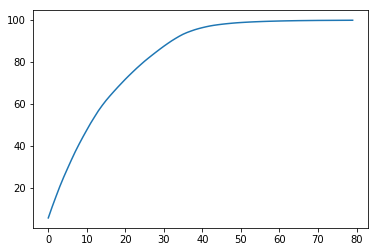

In [158]:
plt.plot(var1)

In [122]:
# The components saturate closely from 45 components onwards
# Therefore a 50 components is a good number of features
pca2 = PCA(n_components=50)

In [123]:
pca2.fit(X)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [124]:
var2= pca2.explained_variance_ratio_

In [125]:
var3=np.cumsum(np.round(pca2.explained_variance_ratio_, decimals=4)*100)

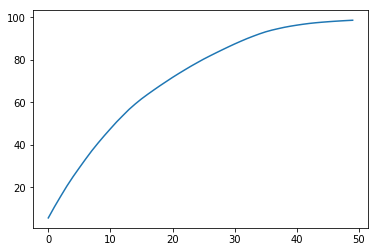

In [127]:
plt.plot(var3)

In [128]:
X1 = pca2.fit_transform(X)

In [129]:
# Transformed data
print(X1)

[[ -91.35344893 -184.25167328  115.33345461 ...,   35.69674877
  -104.41681141  -31.26725045]
 [-313.2523945  -474.85219354  966.01758398 ..., -374.03591681
  -427.37445002   64.52738236]
 [  91.07491158  -42.21800705  121.63861567 ...,  -30.55575649  -11.6963382
    22.74729696]
 ..., 
 [ -51.29434164  -22.08693111  -36.43180564 ...,   54.6193354    63.35367743
     4.8573509 ]
 [ -45.4683138  -176.95550753  110.65263584 ...,   14.94507961  -19.4987104
   -52.619663  ]
 [  19.41441016   48.07835864   46.49537156 ...,   33.45827371
   -10.90469002  -61.17389694]]


In [146]:
X1.shape

(11500, 50)

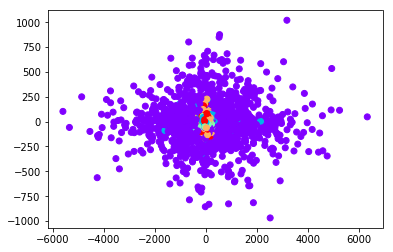

In [131]:
# Visualization of the transformed data
plt.scatter(X1[:,0],X1[:,49],c=Y,cmap='rainbow')

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.3, random_state = 100)

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
dtree = DecisionTreeClassifier()

In [136]:
dtree.fit(X1_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [137]:
predictions = dtree.predict(X1_test)

In [138]:
predictions

array([3, 4, 1, ..., 4, 5, 1], dtype=int64)

In [139]:
from sklearn.metrics import classification_report,confusion_matrix

In [142]:
cm = confusion_matrix(Y_test,predictions, labels = [1, 2, 3, 4, 5])

In [147]:
print(cm)

[[551  56  34  36  14]
 [ 36 280 222  51  78]
 [ 10 219 333  43 106]
 [ 20  53  59 400 162]
 [  8  93  93 180 313]]


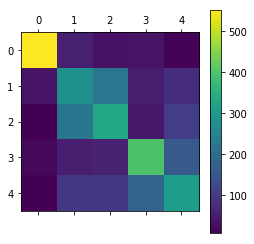

In [148]:
plt.matshow(cm)
plt.colorbar()
plt.show()

In [150]:
from __future__ import print_function
from sklearn import metrics
print(metrics.accuracy_score(Y_test, predictions))

0.544057971014


In [153]:
# KNN classification with 10 folds cross validation on principal components
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [154]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    print("The K is: ", k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X1, Y, cv=10, scoring='accuracy')
    print(scores.mean())
    k_scores.append(scores.mean())
print(k_scores)

The K is:  1
0.561826086957
The K is:  2
0.515652173913
The K is:  3
0.504
The K is:  4
0.497739130435
The K is:  5
0.49
The K is:  6
0.480260869565
The K is:  7
0.470173913043
The K is:  8
0.463391304348
The K is:  9
0.459826086957
The K is:  10
0.452434782609
The K is:  11
0.449217391304
The K is:  12
0.443826086957
The K is:  13
0.442782608696
The K is:  14
0.44052173913
The K is:  15
0.44252173913
The K is:  16
0.435565217391
The K is:  17
0.433391304348
The K is:  18
0.432869565217
The K is:  19
0.429043478261
The K is:  20
0.422956521739
The K is:  21
0.421652173913
The K is:  22
0.419391304348
The K is:  23
0.414869565217
The K is:  24
0.414956521739
The K is:  25
0.412260869565
The K is:  26
0.410434782609
The K is:  27
0.40852173913
The K is:  28
0.406869565217
The K is:  29
0.40652173913
The K is:  30
0.402608695652
[0.5618260869565217, 0.51565217391304352, 0.504, 0.49773913043478257, 0.48999999999999994, 0.48026086956521735, 0.47017391304347828, 0.46339130434782605, 0.459826

Text(0,0.5,'Cross-Validated Accuracy')

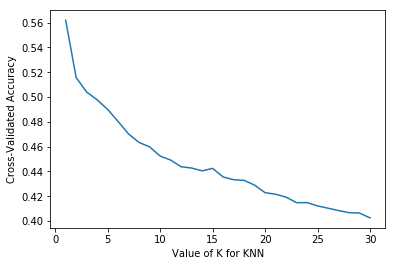

In [155]:
K_range = list(range(1,31))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
# Comments: Results are not very different from that done on PCA scores in R

In [159]:
## KNN on selected features obtained by Logistic regression on original data
eeg_s = pd.read_csv('eeg_select.csv')

In [160]:
eeg_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 11 columns):
X4      11500 non-null int64
X7      11500 non-null int64
X9      11500 non-null int64
X10     11500 non-null int64
X23     11500 non-null int64
X24     11500 non-null int64
X26     11500 non-null int64
X99     11500 non-null int64
X100    11500 non-null int64
X102    11500 non-null int64
y       11500 non-null int64
dtypes: int64(11)
memory usage: 988.4 KB


In [163]:
Y_s = list(eeg_s.pop('y'))

In [164]:
X_s = eeg_s.values

In [165]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    print("The K is: ", k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores_s = cross_val_score(knn, X_s, Y_s, cv=10, scoring='accuracy')
    print(scores_s.mean())
    k_scores.append(scores_s.mean())
print(k_scores)

The K is:  1
0.449913043478
The K is:  2
0.432869565217
The K is:  3
0.43947826087
The K is:  4
0.450173913043
The K is:  5
0.452608695652
The K is:  6
0.452173913043
The K is:  7
0.458347826087
The K is:  8
0.45747826087
The K is:  9
0.458434782609
The K is:  10
0.45652173913
The K is:  11
0.457217391304
The K is:  12
0.457217391304
The K is:  13
0.456695652174
The K is:  14
0.457217391304
The K is:  15
0.45947826087
The K is:  16
0.458782608696
The K is:  17
0.458782608696
The K is:  18
0.457391304348
The K is:  19
0.459217391304
The K is:  20
0.458173913043
The K is:  21
0.459739130435
The K is:  22
0.45852173913
The K is:  23
0.457826086957
The K is:  24
0.458347826087
The K is:  25
0.456
The K is:  26
0.454608695652
The K is:  27
0.45747826087
The K is:  28
0.456782608696
The K is:  29
0.457304347826
The K is:  30
0.453652173913
[0.44991304347826083, 0.43286956521739128, 0.43947826086956515, 0.45017391304347837, 0.45260869565217393, 0.4521739130434782, 0.45834782608695657, 0.45747

Text(0,0.5,'Cross-Validated Accuracy')

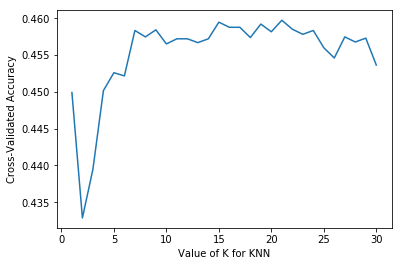

In [166]:
K_range = list(range(1,31))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [167]:
X_s_train, X_s_test, Y_s_train, Y_s_test = train_test_split(X_s, Y_s, test_size = 0.3, random_state = 100)

In [168]:
dtree.fit(X_s_train, Y_s_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [169]:
predict = dtree.predict(X_s_test)

In [170]:
predict

array([2, 2, 1, ..., 3, 3, 1], dtype=int64)

In [171]:
cm_s = confusion_matrix(Y_s_test,predict, labels = [1, 2, 3, 4, 5])

In [172]:
print(cm_s)

[[493  78  46  57  17]
 [ 58 218 163  96 132]
 [ 30 209 210  89 173]
 [ 61 107 107 246 173]
 [ 16 137 149 173 212]]


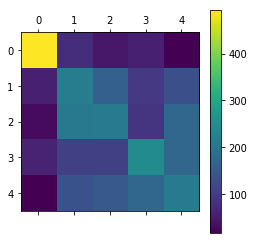

In [173]:
plt.matshow(cm_s)
plt.colorbar()
plt.show()

In [174]:
print(metrics.accuracy_score(Y_s_test, predict))

0.399710144928


In [ ]:
# comment: PCA transform is better than selected features as features are highly comparable
# However, KNN is not a good classifier for the data with all classes together